In [1]:
%%capture
# Importing required libraries
import pandas as pd
import numpy as np

import statsmodels.formula.api as smf

In [2]:
SDGData = pd.read_csv('https://raw.githubusercontent.com/pruthvireddy/SDGGoals_ACausalStudy/main/Data/Processed/GlobalData.csv')
SDGDataUn = pd.read_csv('https://raw.githubusercontent.com/pruthvireddy/SDGGoals_ACausalStudy/main/Data/Processed/ModelData.csv')


SDGData=SDGData.rename(columns = {'economic_category':'econ_cat'})
SDGDataUn=SDGDataUn.rename(columns = {'economic_category':'econ_cat'})

In [3]:
SDGData.head()

,metric_key,year,econ_cat,GDP,GDP_15,GDP_PC,GDP_PC_PPP,GDP_PC_PPP_17,GDP_PEMP,GDP_PPP,MFG_VA,ELC_POP,ELC_RUR_POP,CO2GDP,AtmCO2
0,developed-2000,2000,Developed,8.159867e+11,1.036680e+12,27748.42,21889.46,33294.94,76780.53,8.407390e+11,16.03,100.0,100.0,0.280833,0.535944
1,developed-2001,2001,Developed,7.833653e+11,1.054067e+12,28201.18,22883.42,33940.95,78184.48,8.784286e+11,15.76,100.0,100.0,0.278944,0.492278
2,developed-2002,2002,Developed,8.153283e+11,1.066910e+12,28634.53,23919.38,34549.04,79313.37,9.144412e+11,15.37,100.0,100.0,0.271167,0.464611
3,developed-2003,2003,Developed,9.523626e+11,1.083325e+12,29056.41,24698.18,35153.29,80366.24,9.427193e+11,15.05,100.0,100.0,0.270889,0.441833
4,developed-2004,2004,Developed,1.084243e+12,1.110886e+12,29864.99,26101.88,36219.06,82640.68,9.914834e+11,14.98,100.0,100.0,0.259389,0.410222


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


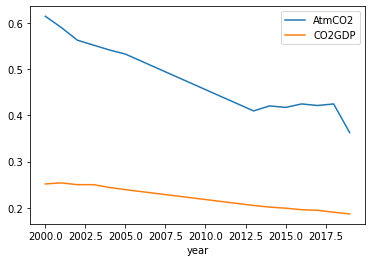

In [4]:
SDGDataUn.groupby('year')['AtmCO2','CO2GDP'].mean().plot();

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


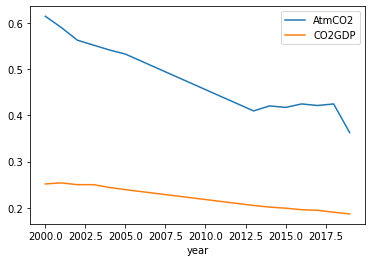

In [5]:
SDGDataUn.groupby('year')['AtmCO2','CO2GDP'].mean().plot();

# Difference-in Difference on GDP_PC_PPP

In [6]:
GDPPCGP = SDGData[SDGData['econ_cat'] != 'Others']
GDPPCGP = GDPPCGP[['year','econ_cat', 'GDP_PC_PPP']].set_index(['year','econ_cat']).unstack('econ_cat').dropna()
GDPPCGP['pa_clim_acc'] = 0
GDPPCGP['pa_clim_acc'] = GDPPCGP.pa_clim_acc.where(GDPPCGP.index>2015,1)

In [7]:
group_mean_check = GDPPCGP.groupby('pa_clim_acc').mean()
group_mean_check

GDP_PC_PPP              
econ_cat        Developed    Developing
pa_clim_acc                            
0            42132.297500  16719.262500
1            28723.466667  13329.887778

In [13]:
GDPPCMod = SDGData.loc[SDGData['econ_cat'] != 'Others', ['year','econ_cat', 'GDP_PC_PPP','CO2GDP' ]].dropna()
GDPPCMod['pa_clim_acc'] = 0
GDPPCMod['pa_clim_acc'] = GDPPCMod.pa_clim_acc.where(GDPPCMod.year>2015,1)

conditions = [
    (GDPPCMod['econ_cat'] == 'Developed')]

choices = [0]
GDPPCMod['econ_cat'] = np.select(conditions, choices, default=1)

In [14]:
model = 'GDP_PC_PPP ~ CO2GDP + year + econ_cat + pa_clim_acc + econ_cat * pa_clim_acc'

GDPPC_Model = smf.ols(formula=model, data=GDPPCMod)
GDPPC_Mod_result = GDPPC_Model.fit()


print(GDPPC_Mod_result.summary())

                            OLS Regression Results                            
Dep. Variable:             GDP_PC_PPP   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     1283.
Date:                Wed, 11 May 2022   Prob (F-statistic):           2.37e-24
Time:                        08:09:42   Log-Likelihood:                -203.94
No. Observations:                  26   AIC:                             419.9
Df Residuals:                      20   BIC:                             427.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -2.608e+05 

In [15]:
print(GDPPC_Mod_result.summary().as_latex())

\begin{center}
\begin{tabular}{lclc}
\toprule
\textbf{Dep. Variable:}          &   GDP\_PC\_PPP   & \textbf{  R-squared:         } &     0.997   \\
\textbf{Model:}                  &       OLS        & \textbf{  Adj. R-squared:    } &     0.996   \\
\textbf{Method:}                 &  Least Squares   & \textbf{  F-statistic:       } &     1283.   \\
\textbf{Date:}                   & Wed, 11 May 2022 & \textbf{  Prob (F-statistic):} &  2.37e-24   \\
\textbf{Time:}                   &     08:09:55     & \textbf{  Log-Likelihood:    } &   -203.94   \\
\textbf{No. Observations:}       &          26      & \textbf{  AIC:               } &     419.9   \\
\textbf{Df Residuals:}           &          20      & \textbf{  BIC:               } &     427.4   \\
\textbf{Df Model:}               &           5      & \textbf{                     } &             \\
\bottomrule
\end{tabular}
\begin{tabular}{lcccccc}
                                 & \textbf{coef} & \textbf{std err} & \textbf{t} & \tex

# Difference-in Difference on CO2GDP

In [21]:
CO2GDP_Mod = SDGData[SDGData['econ_cat'] != 'Others']
CO2GDP_Mod = CO2GDP_Mod[['year','econ_cat', 'CO2GDP', 'GDP_PEMP']].set_index(['year','econ_cat']).unstack('econ_cat').dropna()
CO2GDP_Mod['pa_clim_acc'] = 0
CO2GDP_Mod['pa_clim_acc'] = CO2GDP_Mod.pa_clim_acc.where(CO2GDP_Mod.index>2015,1)

In [22]:
group_mean_check = CO2GDP_Mod.groupby('pa_clim_acc').mean()
group_mean_check

CO2GDP                 GDP_PEMP              
econ_cat    Developed Developing     Developed    Developing
pa_clim_acc                                                 
0            0.176764   0.213342  91102.582500  38284.192500
1            0.243290   0.239281  82942.317778  34464.574444

In [24]:
CO2GDP_Mod = SDGData.loc[SDGData['econ_cat'] != 'Others', ['year','econ_cat', 'CO2GDP','GDP_PEMP']].dropna()
CO2GDP_Mod['pa_clim_acc'] = 0
CO2GDP_Mod['pa_clim_acc'] = CO2GDP_Mod.pa_clim_acc.where(GDPPCMod.year>2015,1)

conditions = [
    (CO2GDP_Mod['econ_cat'] == 'Developed')]

choices = [0]
CO2GDP_Mod['econ_cat'] = np.select(conditions, choices, default=1)

In [25]:
model = 'GDP_PEMP ~ CO2GDP + year + econ_cat + pa_clim_acc + econ_cat * pa_clim_acc'

CO2GDP_Model = smf.ols(formula=model, data=CO2GDP_Mod)
CO2GDP_Mod_reults = CO2GDP_Model.fit()


print(CO2GDP_Mod_reults.summary())

                            OLS Regression Results                            
Dep. Variable:               GDP_PEMP   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     6077.
Date:                Wed, 11 May 2022   Prob (F-statistic):           4.30e-31
Time:                        08:28:25   Log-Likelihood:                -205.20
No. Observations:                  26   AIC:                             422.4
Df Residuals:                      20   BIC:                             429.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -3.132e+05 

In [26]:
print(CO2GDP_Mod_reults.summary().as_latex())

\begin{center}
\begin{tabular}{lclc}
\toprule
\textbf{Dep. Variable:}          &    GDP\_PEMP     & \textbf{  R-squared:         } &     0.999   \\
\textbf{Model:}                  &       OLS        & \textbf{  Adj. R-squared:    } &     0.999   \\
\textbf{Method:}                 &  Least Squares   & \textbf{  F-statistic:       } &     6077.   \\
\textbf{Date:}                   & Wed, 11 May 2022 & \textbf{  Prob (F-statistic):} &  4.30e-31   \\
\textbf{Time:}                   &     08:29:01     & \textbf{  Log-Likelihood:    } &   -205.20   \\
\textbf{No. Observations:}       &          26      & \textbf{  AIC:               } &     422.4   \\
\textbf{Df Residuals:}           &          20      & \textbf{  BIC:               } &     429.9   \\
\textbf{Df Model:}               &           5      & \textbf{                     } &             \\
\bottomrule
\end{tabular}
\begin{tabular}{lcccccc}
                                 & \textbf{coef} & \textbf{std err} & \textbf{t} & \tex

# Difference-in Difference on AtmCO2

In [27]:
AtmCO2_Mod = SDGData[SDGData['econ_cat'] != 'Others']
AtmCO2_Mod = AtmCO2_Mod[['year','econ_cat', 'AtmCO2']].set_index(['year','econ_cat']).unstack('econ_cat').dropna()
AtmCO2_Mod['pa_clim_acc'] = 0
AtmCO2_Mod['pa_clim_acc'] = AtmCO2_Mod.pa_clim_acc.where(AtmCO2_Mod.index>2015,1)

In [28]:
group_mean_check = AtmCO2_Mod.groupby('pa_clim_acc').mean()
group_mean_check

AtmCO2           
econ_cat    Developed Developing
pa_clim_acc                     
0            0.239847   0.544637
1            0.355847   0.597119

In [29]:
AtmCO2_Mod = SDGData.loc[SDGData['econ_cat'] != 'Others', ['year','econ_cat', 'GDP_PC_PPP', 'AtmCO2']].dropna()
AtmCO2_Mod['pa_clim_acc'] = 0
AtmCO2_Mod['pa_clim_acc'] = AtmCO2_Mod.pa_clim_acc.where(GDPPCMod.year>2015,1)

conditions = [
    (AtmCO2_Mod['econ_cat'] == 'Developed')]

choices = [0]
AtmCO2_Mod['econ_cat'] = np.select(conditions, choices, default=1)

In [30]:
model = 'GDP_PC_PPP ~ AtmCO2 + year + econ_cat + pa_clim_acc + econ_cat * pa_clim_acc'

AtmCO2_Model = smf.ols(formula=model, data=AtmCO2_Mod)
AtmCO2_Mod_results = AtmCO2_Model.fit()


print(AtmCO2_Mod_results.summary())

                            OLS Regression Results                            
Dep. Variable:             GDP_PC_PPP   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     271.4
Date:                Wed, 11 May 2022   Prob (F-statistic):           1.16e-17
Time:                        08:35:08   Log-Likelihood:                -223.99
No. Observations:                  26   AIC:                             460.0
Df Residuals:                      20   BIC:                             467.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             -2.81e+05 

In [31]:
print(AtmCO2_Mod_results.summary().as_latex())

\begin{center}
\begin{tabular}{lclc}
\toprule
\textbf{Dep. Variable:}          &   GDP\_PC\_PPP   & \textbf{  R-squared:         } &     0.985   \\
\textbf{Model:}                  &       OLS        & \textbf{  Adj. R-squared:    } &     0.982   \\
\textbf{Method:}                 &  Least Squares   & \textbf{  F-statistic:       } &     271.4   \\
\textbf{Date:}                   & Wed, 11 May 2022 & \textbf{  Prob (F-statistic):} &  1.16e-17   \\
\textbf{Time:}                   &     08:35:20     & \textbf{  Log-Likelihood:    } &   -223.99   \\
\textbf{No. Observations:}       &          26      & \textbf{  AIC:               } &     460.0   \\
\textbf{Df Residuals:}           &          20      & \textbf{  BIC:               } &     467.5   \\
\textbf{Df Model:}               &           5      & \textbf{                     } &             \\
\bottomrule
\end{tabular}
\begin{tabular}{lcccccc}
                                 & \textbf{coef} & \textbf{std err} & \textbf{t} & \tex

# Difference-in Difference on AtmCO2

In [ ]:
AtmCO2_Mod = SDGData[SDGData['econ_cat'] != 'Others']
AtmCO2_Mod = AtmCO2_Mod[['year','econ_cat', 'AtmCO2']].set_index(['year','econ_cat']).unstack('econ_cat').dropna()
AtmCO2_Mod['pa_clim_acc'] = 0
AtmCO2_Mod['pa_clim_acc'] = AtmCO2_Mod.pa_clim_acc.where(AtmCO2_Mod.index>2015,1)

In [ ]:
group_mean_check = AtmCO2_Mod.groupby('pa_clim_acc').mean()
group_mean_check

AtmCO2           
econ_cat    Developed Developing
pa_clim_acc                     
0            0.239847   0.544637
1            0.355847   0.597119

In [32]:
AtmCO2_Mod = SDGData.loc[SDGData['econ_cat'] != 'Others', ['year','econ_cat', 'GDP_PEMP', 'AtmCO2']].dropna()
AtmCO2_Mod['pa_clim_acc'] = 0
AtmCO2_Mod['pa_clim_acc'] = AtmCO2_Mod.pa_clim_acc.where(GDPPCMod.year>2015,1)

conditions = [
    (AtmCO2_Mod['econ_cat'] == 'Developed')]

choices = [0]
AtmCO2_Mod['econ_cat'] = np.select(conditions, choices, default=1)

In [33]:
model = 'GDP_PEMP ~ AtmCO2 + year + econ_cat + pa_clim_acc + econ_cat * pa_clim_acc'

AtmCO2_Model = smf.ols(formula=model, data=AtmCO2_Mod)
AtmCO2_Mod_results = AtmCO2_Model.fit()


print(AtmCO2_Mod_results.summary())

                            OLS Regression Results                            
Dep. Variable:               GDP_PEMP   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     4695.
Date:                Wed, 11 May 2022   Prob (F-statistic):           5.67e-30
Time:                        08:38:24   Log-Likelihood:                -208.55
No. Observations:                  26   AIC:                             429.1
Df Residuals:                      20   BIC:                             436.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              1.39e+05 

In [34]:
print(AtmCO2_Mod_results.summary().as_latex())

\begin{center}
\begin{tabular}{lclc}
\toprule
\textbf{Dep. Variable:}          &    GDP\_PEMP     & \textbf{  R-squared:         } &     0.999   \\
\textbf{Model:}                  &       OLS        & \textbf{  Adj. R-squared:    } &     0.999   \\
\textbf{Method:}                 &  Least Squares   & \textbf{  F-statistic:       } &     4695.   \\
\textbf{Date:}                   & Wed, 11 May 2022 & \textbf{  Prob (F-statistic):} &  5.67e-30   \\
\textbf{Time:}                   &     08:38:37     & \textbf{  Log-Likelihood:    } &   -208.55   \\
\textbf{No. Observations:}       &          26      & \textbf{  AIC:               } &     429.1   \\
\textbf{Df Residuals:}           &          20      & \textbf{  BIC:               } &     436.7   \\
\textbf{Df Model:}               &           5      & \textbf{                     } &             \\
\bottomrule
\end{tabular}
\begin{tabular}{lcccccc}
                                 & \textbf{coef} & \textbf{std err} & \textbf{t} & \tex